In [117]:
import os
import tensorflow as tf
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import noisereduce as nr

In [118]:
train_male = "./Dataset/train/male"
train_female = "./Dataset/train/female"

val_male = "./Dataset/val/male"
val_female = "./Dataset/val/female"


In [119]:
male_list = os.listdir(train_male)
print(f"train_Male = {male_list[:10]}")

female_list = os.listdir(train_female)
print(f"train_Female = {female_list[:10]}")

val_male_list = os.listdir(val_male)
print(f"val_Male = {val_male_list[:10]}")

val_female_list = os.listdir(val_female)
print(f"val_Female = {val_female_list[:10]}")

train_Male = ['1105.wav', '1106.wav', '1107.wav', '1108.wav', '1109.wav', '1110.wav', '1111.wav', '1112.wav', '1113.wav', '1114.wav']
train_Female = ['1000.wav', '1001.wav', '1002.wav', '1003.wav', '1004.wav', '1005.wav', '1006.wav', '1007.wav', '1008.wav', '1009.wav']
val_Male = ['0.wav', '1.wav', '10.wav', '100.wav', '1000.wav', '1001.wav', '1002.wav', '1003.wav', '1004.wav', '1005.wav']
val_Female = ['0.wav', '1.wav', '10.wav', '100.wav', '101.wav', '102.wav', '103.wav', '104.wav', '105.wav', '106.wav']


In [120]:
print(f"total train_male = {len(male_list)}")
print(f"total train_female = {len(female_list)}")

print(f"total val_male = {len(val_male_list)}")
print(f"total val_female = {len(val_female_list)}")

total train_male = 2577
total train_female = 1618
total val_male = 1105
total val_female = 693


In [121]:
def extract_features(file_path):
    # Fungsi ekstraksi fitur suara (gunakan sesuai kebutuhan Anda)
    # Contoh sederhana menggunakan Librosa
    audio_data, sr = librosa.load(file_path, sr=None)
    audio_data = nr.reduce_noise(audio_data, sr)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

In [122]:
def load_data(folder_path, label):
    data = []
    labels = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        features = extract_features(filepath)
        data.append(features)
        labels.append(label)
    return np.array(data), np.array(labels)


In [123]:
X_train_male, y_train_male = load_data(train_male, 1)

In [124]:
X_train_female, y_train_female = load_data(train_female, 0)

In [125]:
X_val_male, y_val_male = load_data(val_male, 1)

In [126]:
X_val_female, y_val_female = load_data(val_female, 0)

In [127]:
# def create_model(vector_length=128):
#     """5 hidden dense layers from 256 units to 64, not the best model."""
#     model = Sequential()
#     model.add(Dense(256, input_shape=(vector_length,)))
#     model.add(Dropout(0.3))
#     model.add(Dense(256, activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(128, activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(128, activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(64, activation="relu"))
#     model.add(Dropout(0.3))
#     # one output neuron with sigmoid activation function, 0 means female, 1 means male
#     model.add(Dense(1, activation="sigmoid"))
#     # using binary crossentropy as it's male/female classification (binary)
#     model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
#     # print summary of the model
#     model.summary()
#     return model

In [128]:
# Gabungkan data training dan validasi
X_train = np.concatenate((X_train_male, X_train_female), axis=0)
y_train = np.concatenate((y_train_male, y_train_female), axis=0)
X_val = np.concatenate((X_val_male, X_val_female), axis=0)
y_val = np.concatenate((y_val_male, y_val_female), axis=0)

In [129]:
# # Normalisasi fitur menggunakan StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

In [130]:
# Pisahkan data validasi dari data training
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [149]:
# Model neural network sederhana
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [150]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
# Pelatihan model
# early_stopping = tf.keras.callbacks.EarlyStopping(mode="min", patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


105/105 [==============================] - 2s 5ms/step - loss: 2.4941 - accuracy: 0.5223 - val_loss: 0.6738 - val_accuracy: 0.6335
Epoch 2/50
105/105 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.5483 - val_loss: 0.6782 - val_accuracy: 0.6140
Epoch 3/50
105/105 [==============================] - 0s 4ms/step - loss: 0.7461 - accuracy: 0.5501 - val_loss: 0.6902 - val_accuracy: 0.6146
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5796 - val_loss: 0.6700 - val_accuracy: 0.6190
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5995 - val_loss: 0.6311 - val_accuracy: 0.6997
Epoch 6/50
105/105 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.6731 - val_loss: 0.4519 - val_accuracy: 0.8637
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7732 - val_loss: 0.3061 - val_accuracy: 0.8910
Epoch 8/50
105/10

In [152]:
# Evaluasi model pada data test
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on test set: {accuracy}")

27/27 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9261
Accuracy on test set: 0.9261025190353394


In [153]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 256)               10496     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 128)              

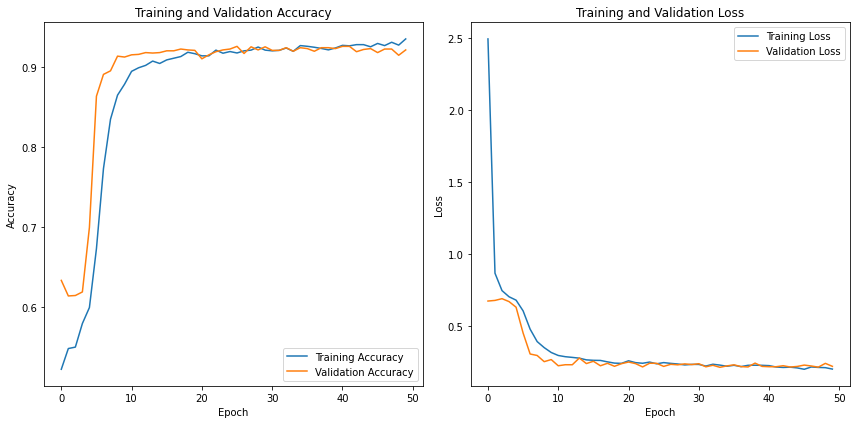

In [154]:
# Plot akurasi
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('white')
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [155]:
model.save("model.h5")

In [156]:
folder_path = "../Dataset/02.Kha\'/"
model = tf.keras.models.load_model('model.h5')

# Buat file teks untuk menyimpan hasil prediksi
output_file_path = "./hasil_prediksi/kha_predict.txt"

# Melakukan prediksi untuk setiap file dalam folder
with open(output_file_path, 'w') as output_file:
    for filename in os.listdir(folder_path):
        # Memastikan file adalah file .wav
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            features = extract_features(file_path).reshape(1, -1)
            
            # Membuat prediksi
            gender_prediction = model.predict(features)
            
            # Menghitung probabilitas untuk male dan female
            male_prob = gender_prediction[0][0]
            female_prob = 1 - male_prob
            gender = "male" if male_prob > female_prob else "female"
            
            # Menampilkan hasil
            result_string = f"File: {filename}\nResult: {gender}\nProbabilities::: Male: {male_prob*100:.2f}%    Female: {female_prob*100:.2f}%\n\n"
            
            # Menuliskan hasil ke file teks
            output_file.write(result_string)

print(f"Hasil prediksi telah disimpan ke {output_file_path}")


1/1 [==============================] - 0s 20ms/step
Hasil prediksi telah disimpan ke ./hasil_prediksi/kha_predict.txt
